# Table of Content
## 1. Introduction
1.1 Data Description
1.2 Objective of this project
## 2. Fetching Data
2.1 Import necessary Libraries
2.2 Import data
## 3. Exploratory Data Analysis (EDA)


## 4. Correlation of the features with target column
## 5. Visualizing correlation of feature columns with label column.
## 6. Checking Distribution of data
## 7. Checking Outliers
7.1 Removing Outliers
7.2 Parcentage of data loss
## 8. Checking Multicollinearity
## 9. Selecting KBest Feature
9.1 Data Before removing skewness
9.2 Data After Removing Skewness
9.3 Balancing the data
## 10. Building Model
10.1 Logistic Regression
10.2 Cross Validation For Logistic Regression
10.3 XGBoost Classifier
10.4 Cross Validation For XGBoost Classifier

## 11. ROC_AUC Curve
## 12. Selecting Best Model
## 13. Hyperparameter Tuning
## 14. Model Save
14.1 Loading the model
14.2 Predicting the class
## 15.Conclusion

# 1. Introduction

- A Microfinance Institution (MFI) is an organization that offers financial services to low income populations. MFS becomes very useful when targeting especially the unbanked poor families living in remote areas with not much sources of income. The Microfinance services (MFS) provided by MFI are Group Loans, Agricultural Loans, Individual Business Loans and so on.
- Many microfinance institutions (MFI), experts and donors are supporting the idea of using mobile financial services (MFS) which they feel are more convenient and efficient, and cost saving, than the traditional high-touch model used since long for the purpose of delivering microfinance services. Though, the MFI industry is primarily focusing on low income families and are very useful in such areas, the implementation of MFS has been uneven with both significant challenges and successes.
- Today, microfinance is widely accepted as a poverty-reduction tool, representing 70 billion in outstanding loans and a global outreach of 200 million clients.
- We are working with one such client that is in Telecom Industry. They are a fixed wireless telecommunications network provider. They have launched various products and have developed its business and organization based on the budget operator model, offering better products at Lower Prices to all value conscious customers through a strategy of disruptive innovation that focuses on the subscriber.

## 1.1 Data Description
- Build a model which can be used to predict in terms of a probability for each loan transaction, whether the customer will be paying back the loaned amount within 5 days of insurance of loan. In this case, Label ‘1’ indicates that the loan has been payed i.e. Non- defaulter, while, Label ‘0’ indicates that the loan has not been payed i.e. defaulter.


### Points to Remember:
- There are no null values in the dataset.
- There may be some customers with no loan history.
- The dataset is imbalanced. Label ‘1’ has approximately 87.5% records, while, label ‘0’ has approximately 12.5% records.
- For some features, there may be values which might not be realistic. You may have to observe them and treat them with a suitable explanation.
- You might come across outliers in some features which you need to handle as per your understanding. Keep in mind that data is expensive and we cannot lose more than 7-8% of the data.
- Find Enclosed the Data Description File and The Sample Data for the Modeling Exercise.

## 1.2 Objective of this project
- The goal of this machine learning project is to predict the Labels.
- This is the classification problem

# 2. Fetching Data
## 2.1 Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
pd.set_option("display.max_columns",None)

## 2.2 Importing dataset

In [11]:
df = pd.read_csv(r'F:\Data Trained csv file\Data file.csv')
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


###  Checking shape of the dataset

In [3]:
df.shape

(209593, 37)

### Checking the type of dataset

In [4]:
df.dtypes

Unnamed: 0                int64
label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_

### Checking Unique values

In [5]:
df.nunique()

Unnamed: 0              209593
label                        2
msisdn                  186243
aon                       4507
daily_decr30            147025
daily_decr90            158669
rental30                132148
rental90                141033
last_rech_date_ma         1186
last_rech_date_da         1174
last_rech_amt_ma            70
cnt_ma_rech30               71
fr_ma_rech30              1083
sumamnt_ma_rech30        15141
medianamnt_ma_rech30       510
medianmarechprebal30     30428
cnt_ma_rech90              110
fr_ma_rech90                89
sumamnt_ma_rech90        31771
medianamnt_ma_rech90       608
medianmarechprebal90     29785
cnt_da_rech30             1066
fr_da_rech30              1072
cnt_da_rech90               27
fr_da_rech90                46
cnt_loans30                 40
amnt_loans30                48
maxamnt_loans30           1050
medianamnt_loans30           6
cnt_loans90               1110
amnt_loans90                69
maxamnt_loans90              3
medianam

### Checking Null Values

In [6]:
df.isnull().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

### Checking the value counts of each columns

In [7]:
df['label'].value_counts()

label
1    183431
0     26162
Name: count, dtype: int64

In [12]:
# see most of the values present 0 so consider is null and drop the features
df['medianmarechprebal90'].value_counts()

medianmarechprebal90
0.00      23391
20.00      1265
19.00      1208
26.00      1171
27.00      1166
          ...  
524.07        1
7.72          1
45.73         1
143.06        1
392.20        1
Name: count, Length: 29785, dtype: int64

In [13]:
# List of features to check
features_to_check = ['medianamnt_loans90', 'payback30', 'medianmarechprebal90', 'amnt_loans90']

# Calculate the percentage of zeros in each feature
zero_percentages = df[features_to_check].apply(lambda col: (col == 0).mean() * 100)

## Dopping the features who's having more than 90% of zero value
df.drop(columns=['medianamnt_loans90','payback30','medianmarechprebal90','amnt_loans90',],axis=1, inplace =True)


In [14]:
# Dropping Unnamed: 0, msisdn and pcircle columns because it's useless.
df.drop(columns=['Unnamed: 0','msisdn','pcircle'], axis=1,inplace=True)

In [15]:
# List of columns to process
columns_to_replace = [
    'medianmarechprebal30', 'sumamnt_ma_rech90', 'cnt_da_rech30', 'fr_da_rech30',
    'medianamnt_loans30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
    'amnt_loans30', 'cnt_loans90'
]

# Replace 0 values with the mean of each column
for col in columns_to_replace:
    df[col] = df[col].replace(0, df[col].mean())


In [16]:
df['pdate'] = pd.to_datetime(df['pdate'])
df['year'] = df['pdate'].dt.year
df['month'] = df['pdate'].dt.month
df['day'] = df['pdate'].dt.day

In [17]:
# Drop Date column:
df.drop('pdate', axis = 1, inplace = True)
df.head()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,maxamnt_loans90,payback90,year,month,day
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,...,2.0,12.0,6.0,0.054029,2.0,6,29.000000,2016,7,20
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,...,1.0,12.0,12.0,0.054029,1.0,12,0.000000,2016,8,10
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,...,1.0,6.0,6.0,0.054029,1.0,6,0.000000,2016,8,19
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,...,2.0,12.0,6.0,0.054029,2.0,6,0.000000,2016,6,6
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,...,7.0,42.0,6.0,0.054029,7.0,6,2.333333,2016,6,22


In [18]:
# Checking info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 32 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   aon                   209593 non-null  float64
 2   daily_decr30          209593 non-null  float64
 3   daily_decr90          209593 non-null  float64
 4   rental30              209593 non-null  float64
 5   rental90              209593 non-null  float64
 6   last_rech_date_ma     209593 non-null  float64
 7   last_rech_date_da     209593 non-null  float64
 8   last_rech_amt_ma      209593 non-null  int64  
 9   cnt_ma_rech30         209593 non-null  int64  
 10  fr_ma_rech30          209593 non-null  float64
 11  sumamnt_ma_rech30     209593 non-null  float64
 12  medianamnt_ma_rech30  209593 non-null  float64
 13  medianmarechprebal30  209593 non-null  float64
 14  cnt_ma_rech90         209593 non-null  int64  
 15  

In [19]:
# Dataset Description
df.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,maxamnt_loans90,payback90,year,month,day
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.0,209593.000000,209593.00000
mean,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,3.978057,...,2.801880,18.231161,274.658747,0.104410,18.700833,6.703134,4.321485,2016.0,6.797321,14.39894
std,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,4.256090,...,2.530866,17.232712,4245.264648,0.205622,224.789939,2.103864,10.308108,0.0,0.741435,8.43890
min,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,0.000000,...,1.000000,6.000000,0.000000,0.054029,1.000000,0.000000,0.000000,2016.0,6.000000,1.00000
25%,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,1.000000,...,1.000000,6.000000,6.000000,0.054029,1.000000,6.000000,0.000000,2016.0,6.000000,7.00000
50%,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,3.000000,...,2.000000,12.000000,6.000000,0.054029,2.000000,6.000000,1.666667,2016.0,7.000000,14.00000
75%,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,5.000000,...,4.000000,24.000000,6.000000,0.054029,5.000000,6.000000,4.500000,2016.0,7.000000,21.00000
max,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,203.000000,...,50.000000,306.000000,99864.560864,3.000000,4997.517944,12.000000,171.500000,2016.0,8.000000,31.00000


# 3. EDA
### Visualization of the data


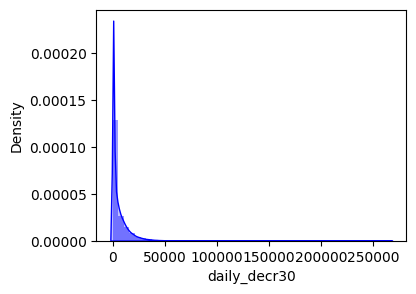

In [24]:
# Distribution plot for the column daily_decr30
plt.figure(figsize=(4,3))
sns.distplot(df["daily_decr30"],color="b",kde_kws={"shade": True},)
plt.show()


 - The column daily_decr30 is not normally distributed and contains some outliers. It is positively skewed (right-skewed).

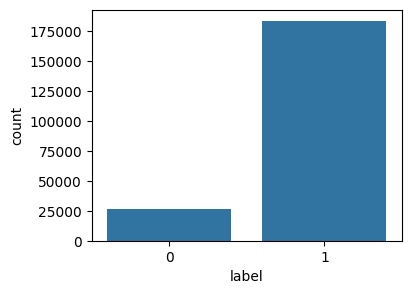

In [25]:
plt.figure(figsize=(4,3))
sns.countplot(x='label',data=df)
plt.show()

- We can see, label is imballanced so we need to balanced it.

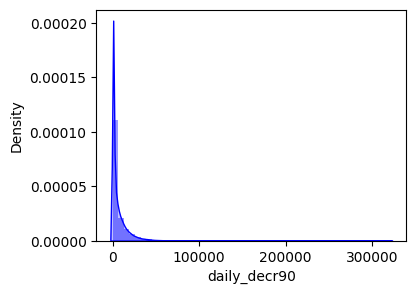

In [26]:
# Distribution plot for the column daily_decr30
plt.figure(figsize=(4,3))
sns.distplot(df["daily_decr90"],color="b",kde_kws={"shade": True},)
plt.show()

- The daily amount spent from the main account, averaged over the last 90 days (in Indonesian Rupiah), is not normally distributed.
- The maximum daily amount spent falls within the range of 0 to 50,000.

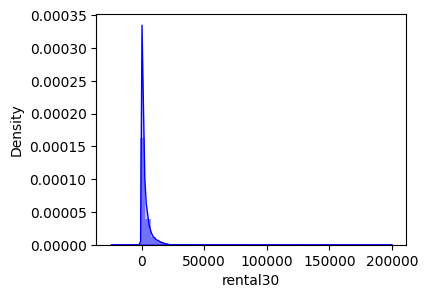

In [27]:
# Distribution plot for the column rental30
plt.figure(figsize=(4,3))
sns.distplot(df["rental30"],color="b",kde_kws={"shade": True},)
plt.show()

- The average main account balance over the last 30 days, referred to as rental30, ranges from 0 to 50,000. The maximum value of rental30 is below 25,000. Additionally, rental30 is not normally distributed.

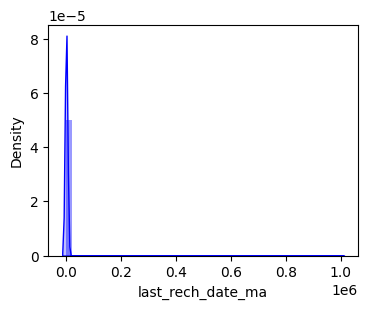

In [28]:
# Distribution plot for the column last_rech_date_ma
plt.figure(figsize=(4,3))
sns.distplot(df["last_rech_date_ma"],color="b",kde_kws={"shade": True},)
plt.show()

- Maximum Number of days till last recharge of main account lie in the range of 0 to 0.2. But mostly the data are contains 0.0.

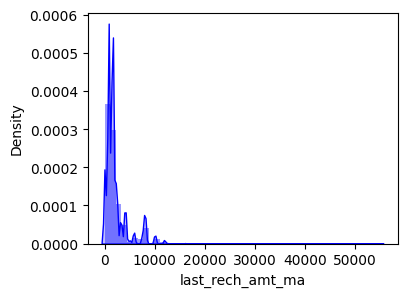

In [29]:
# Distribution plot for the column last_rech_date_ma
plt.figure(figsize=(4,3))
sns.distplot(df["last_rech_amt_ma"],color="b",kde_kws={"shade": True},)
plt.show()

- The amount of the last recharge of the main account ranges from 0 to 10,000. However, most of the data falls below 6,000. The data is not normally distributed and is positively skewed (right-skewed).

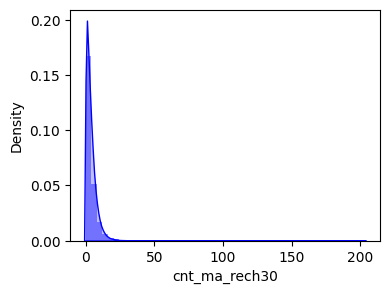

In [30]:
# Distribution plot for the column cnt_ma_rech30
plt.figure(figsize=(4,3))
sns.distplot(df["cnt_ma_rech30"],color="b",kde_kws={"shade": True},)
plt.show()

- The main account was recharged fewer than 30 times in the last 30 days. The data is positively skewed.

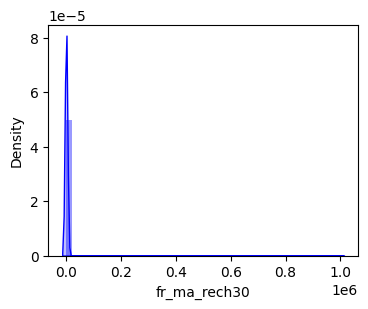

In [31]:
# Distribution plot for the column cnt_ma_rech30
plt.figure(figsize=(4,3))
sns.distplot(df["fr_ma_rech30"],color="b",kde_kws={"shade": True},)
plt.show()

- We can see, almot o time Frequency of main account recharged in last 30 days.

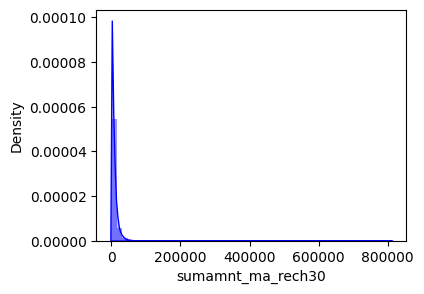

In [33]:
# Distribution plot for the column sumamnt_ma_rech30
plt.figure(figsize=(4,3))
sns.distplot(df["sumamnt_ma_rech30"],color="b",kde_kws={"shade": True},)
plt.show()

- Less than 50000 time the Total amount of recharge in main account over last 30 days is happend.

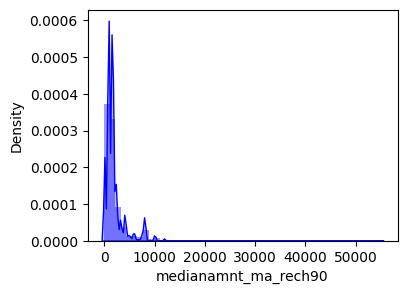

In [34]:
# Distribution plot for the column medianamnt_ma_rech90
plt.figure(figsize=(4,3))
sns.distplot(df["medianamnt_ma_rech90"],color="b",kde_kws={"shade": True},)
plt.show()

- Less than 10000 time Median of amount of recharges done in main account over last 30 days at user level.

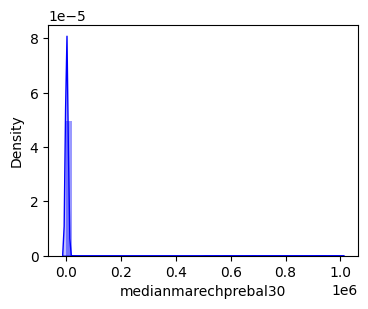

In [35]:
# Distribution plot for the column medianmarechprebal30
plt.figure(figsize=(4,3))
sns.distplot(df["medianmarechprebal30"],color="b",kde_kws={"shade": True},)
plt.show()

- The median main account balance just before a recharge in the last 30 days, at the user level, is 0. This indicates that users typically have a balance of 0 when recharging within the last 30 days.

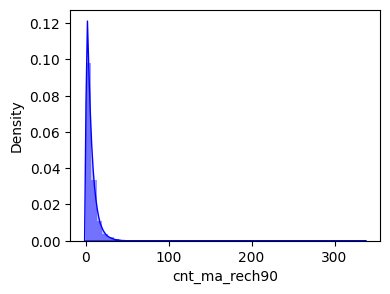

In [36]:
# Distribution plot for the column cnt_ma_rech90 
plt.figure(figsize=(4,3))
sns.distplot(df["cnt_ma_rech90"],color="b",kde_kws={"shade": True},)
plt.show()

- The main account was recharged fewer than 30 times in the last 90 days, which has a significantly higher count compared to other values. This indicates that the data is positively skewed.

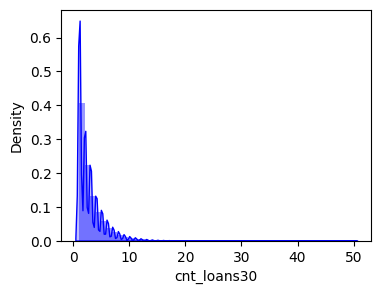

In [37]:
# Distribution plot for the column cnt_loans30
plt.figure(figsize=(4,3))
sns.distplot(df["cnt_loans30"],color="b",kde_kws={"shade": True})
plt.show()

- We observe that users have taken fewer than 10 loans in the last 30 days. Most users have taken up to 5 loans during this period.

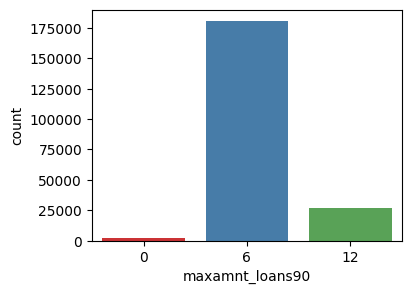

In [40]:
plt.figure(figsize=(4,3))
sns.countplot(x='maxamnt_loans90', data=df, palette='Set1')
plt.show()

- We can see that users are taking loans fewer than 6 times, followed by 12 times. A value of 0 indicates that these users are not taking any loans.

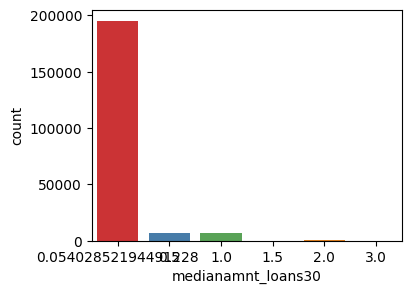

In [41]:
plt.figure(figsize=(4,3))
sns.countplot(x='medianamnt_loans30',data=df,palette='Set1')
plt.show()

- We can see 0 is a Median of amounts of loan taken by the user in last 30 days.

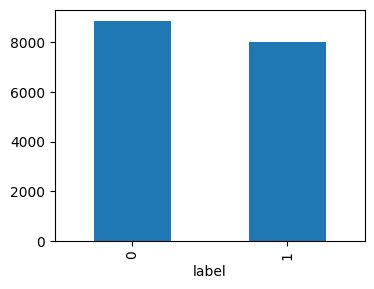

In [42]:
# Bivariate Analysis
plt.figure(figsize=(4,3))
df.groupby('label')['aon'].mean().plot.bar()
plt.show()

- Customers with a high value of "Age on cellular network in days" (aon) are the maximum defaulters (those who have not paid their loan amount, i.e., 0).

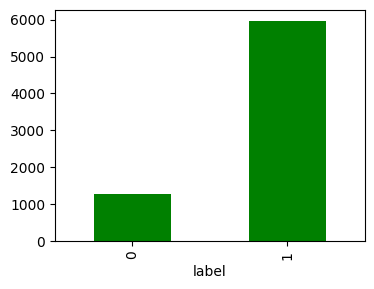

In [43]:
plt.figure(figsize=(4,3))
df.groupby('label')['daily_decr30'].mean().plot.bar(color='g')
plt.show()

- Customers with a high value of the daily amount spent from the main account, averaged over the last 30 days (in Indonesian Rupiah) (daily_decr30), are the maximum non-defaulters (those who have paid their loan amount, i.e., 1).

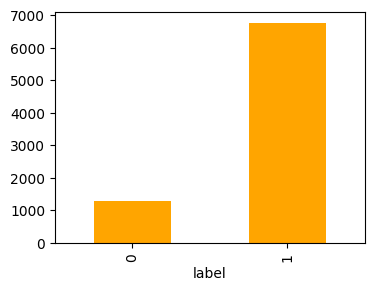

In [44]:
plt.figure(figsize=(4,3))
df.groupby('label')['daily_decr90'].mean().plot.bar(color='orange')
plt.show()

- Customers with a high value of the daily amount spent from the main account, averaged over the last 90 days (in Indonesian Rupiah) (daily_decr90), are the maximum non-defaulters (those who have paid their loan amount, i.e., 1).

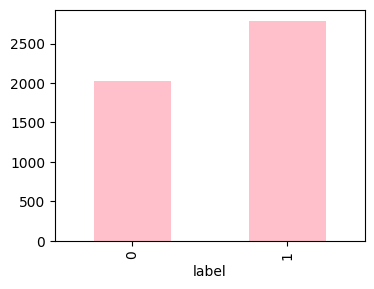

In [45]:
plt.figure(figsize=(4,3))
df.groupby('label')['rental30'].mean().plot.bar(color='pink')
plt.show()

- Customers with a high value of the average main account balance over the last 30 days (rental30) are the maximum non-defaulters (those who have paid their loan amount, i.e., 1).

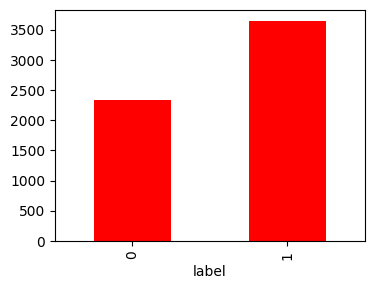

In [46]:
plt.figure(figsize=(4,3))
df.groupby('label')['rental90'].mean().plot.bar(color='red')
plt.show()

- Customers with a high value of the average main account balance over the last 90 days (rental90) are the maximum non-defaulters (those who have paid their loan amount, i.e., 1)

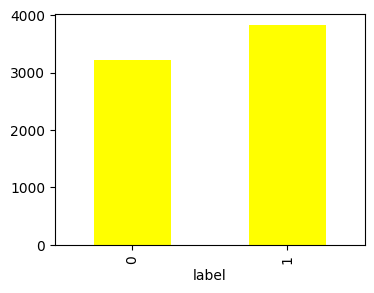

In [47]:
plt.figure(figsize=(4,3))
df.groupby('label')['last_rech_date_ma'].mean().plot.bar(color='yellow')
plt.show()

- Customers with a high number of days until the last recharge of the main account (last_rech_date_ma) are the maximum non-defaulters (those who have paid their loan amount, i.e., 1).

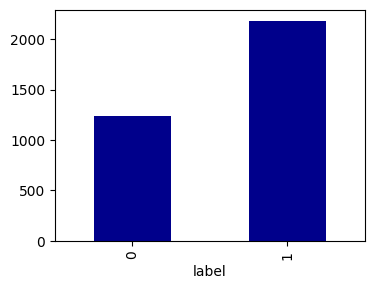

In [48]:
plt.figure(figsize=(4,3))
df.groupby('label')['last_rech_amt_ma'].mean().plot.bar(color='darkblue')
plt.show()

- Customers with a high value of the amount of the last recharge of the main account (in Indonesian Rupiah) (last_rech_amt_ma) are the maximum non-defaulters (those who have paid their loan amount, i.e., 1).

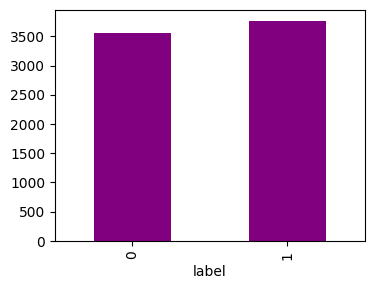

In [49]:
plt.figure(figsize=(4,3))
df.groupby('label')['fr_ma_rech30'].mean().plot.bar(color='purple')
plt.show()

- We can see that the frequency of the main account being recharged in the last 30 days is similar across different users. Among them, those who are not defaulting on their loan are higher in number than those who are defaulting. However, while the count of loan defaulters is also high, it is still lower than the count of non-defaulters.

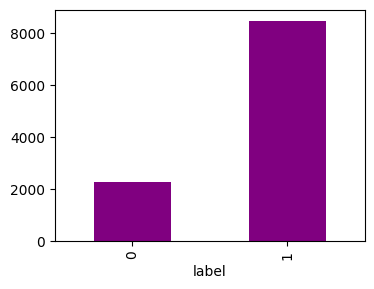

In [50]:
plt.figure(figsize=(4,3))
df.groupby('label')['sumamnt_ma_rech30'].mean().plot.bar(color='purple')
plt.show()

- We can see that the majority of customers are recharging their accounts at the same time. However, the total amount of recharge in the main account over the last 30 days (in Indonesian Rupiah) is lower for loan defaulters compared to non-defaulters.

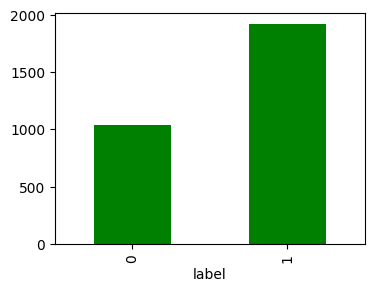

In [51]:
plt.figure(figsize=(4,3))
df.groupby('label')['medianamnt_ma_rech30'].mean().plot.bar(color='green')
plt.show()

- Customers with high value of Median of amount of recharges done in main account over last 30 days at user level (in Indonesian Rupiah)(medianamnt_ma_rech30) are maximum Non-defaulters(who have paid there loan amount-1).

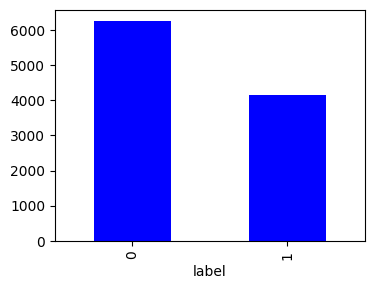

In [52]:
plt.figure(figsize=(4,3))
df.groupby('label')['medianmarechprebal30'].mean().plot.bar(color='b')
plt.show()

- The median of the main account balance just before a recharge in the last 30 days, at the user level (in Indonesian Rupiah), is higher for those who are defaulting on their loans. It is lower for those who are not defaulting on their loans.

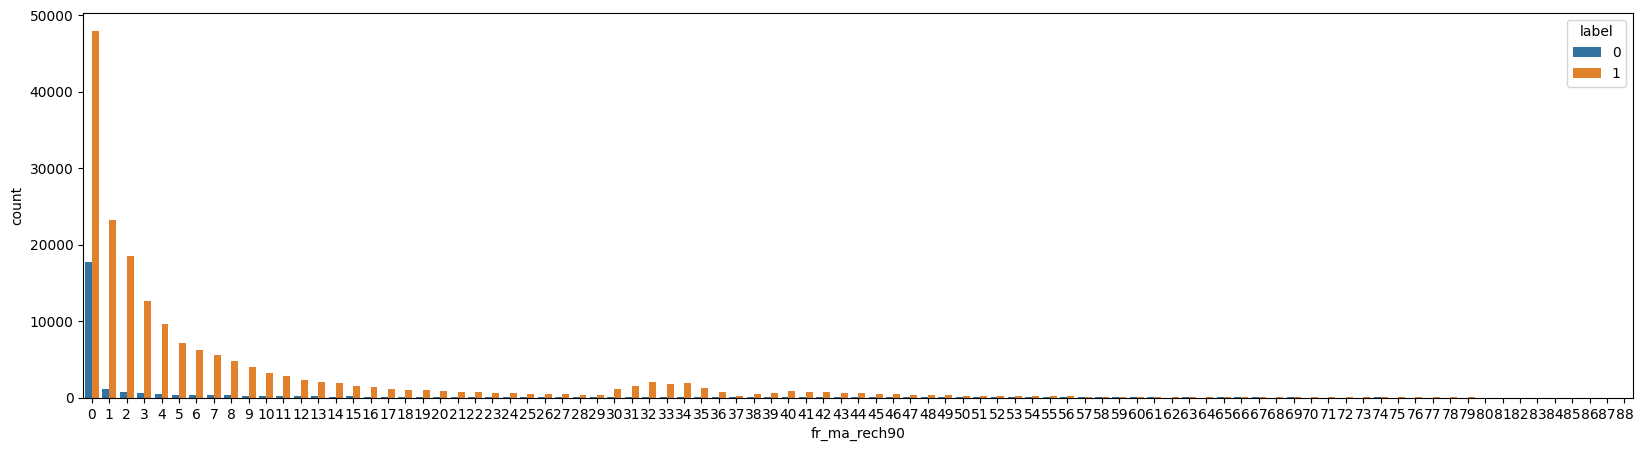

In [54]:
plt.figure(figsize=(20,5))
sns.countplot(x='fr_ma_rech90',hue='label',data=df)
plt.show()

- We can see there are less Frequency of main account recharged in last 90 days whose defaulting the loan.

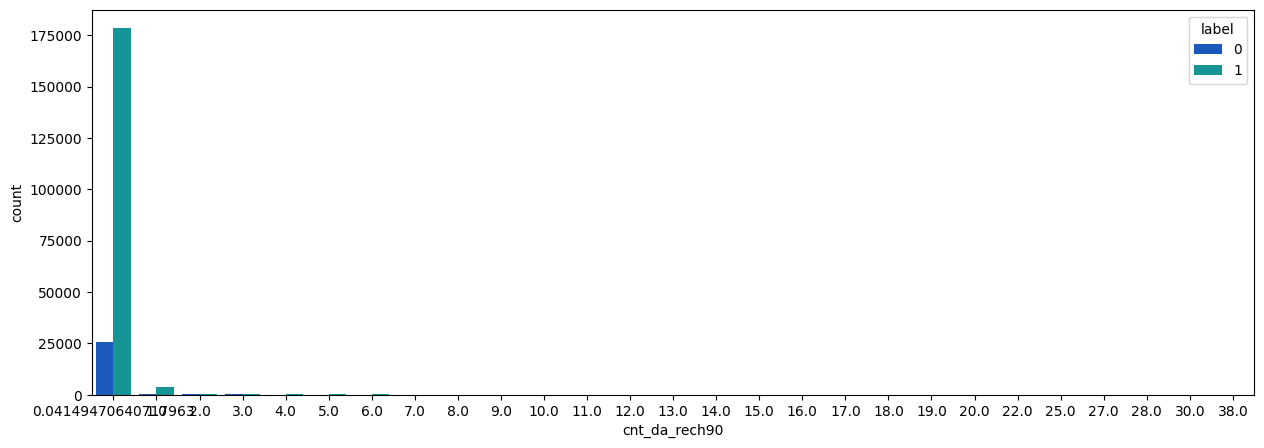

In [55]:
plt.figure(figsize=(15,5))
sns.countplot(x='cnt_da_rech90',hue='label',data=df,palette='winter')
plt.show()

- We can see, there are less defaulter whose having less Number of times data account got recharged in last 30 days.

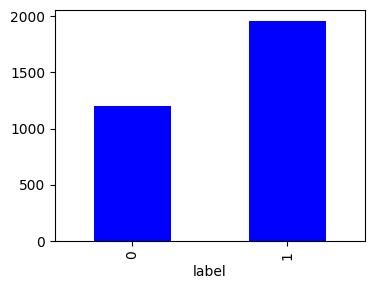

In [56]:
plt.figure(figsize=(4,3))
df.groupby('label')['medianamnt_ma_rech90'].mean().plot.bar(color='b')
plt.show()

- The median amount of recharges done in the main account over the last 90 days, at the user level (in Indonesian Rupiah), shows fewer loan defaulters. However, the count of loan defaulters increases up to 1,175.

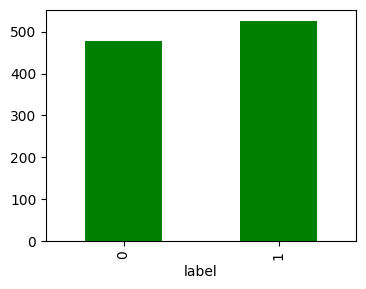

In [57]:
plt.figure(figsize=(4,3))
df.groupby('label')['cnt_da_rech30'].mean().plot.bar(color='g')
plt.show()

- The number of times the data account was recharged in the last 30 days (cnt_dat_rech30) is higher for non-defaulters than for defaulters. However, the count of loan non-defaulters is also high, though slightly lower than the count of non-defaulters.

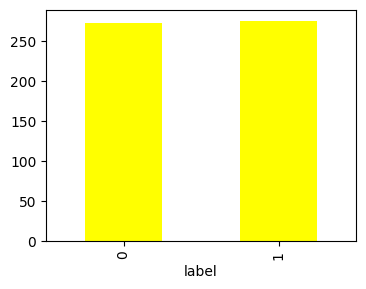

In [58]:
plt.figure(figsize=(4,3))
df.groupby('label')['maxamnt_loans30'].mean().plot.bar(color='yellow')
plt.show()

- We can see that the maximum amount of loan taken by users in the last 30 days is almost the same for both loan defaulters and non-defaulters. This suggests that users are taking large loans but not paying them back, resulting in loan defaults.

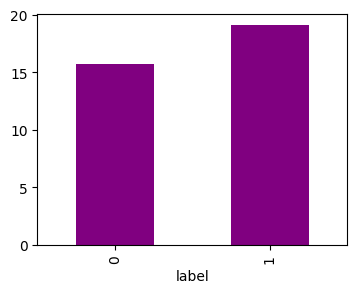

In [59]:
plt.figure(figsize=(4,3))
df.groupby('label')['cnt_loans90'].mean().plot.bar(color='purple')
plt.show()

- The number of loans taken by users in the last 90 days is high, and it is even higher among non-defaulters. However, the number of loan defaulters is slightly lower than the number of non-defaulters.

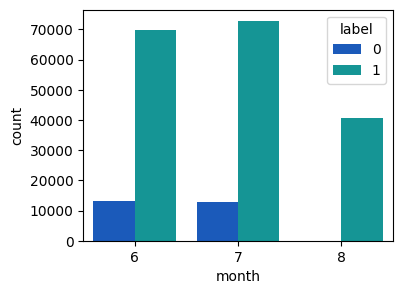

In [60]:
plt.figure(figsize=(4,3))
sns.countplot(x='month',hue='label',data=df,palette='winter')
plt.show()

- We can see that in the 7th month, the number of loans taken by customers is higher than in the 6th month, and loan defaults are also higher in the 7th month compared to the 6th month. 
- However, in the 8th month, there are no non-defaulting loans, which means that in this month, customers are not defaulting on their loans.

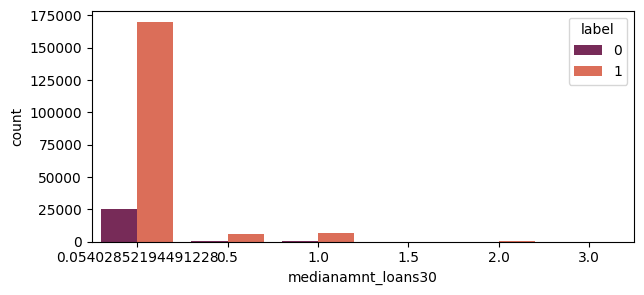

In [62]:
plt.figure(figsize=(7,3))
sns.countplot(x='medianamnt_loans30',hue='label',data=df,palette='rocket')
plt.show()

- The median amount of loans taken by users in the last 30 days is higher for non-defaulters. In this case, there are only 6 categories, with the category of 0.05 having the highest number of non-defaulting customers.

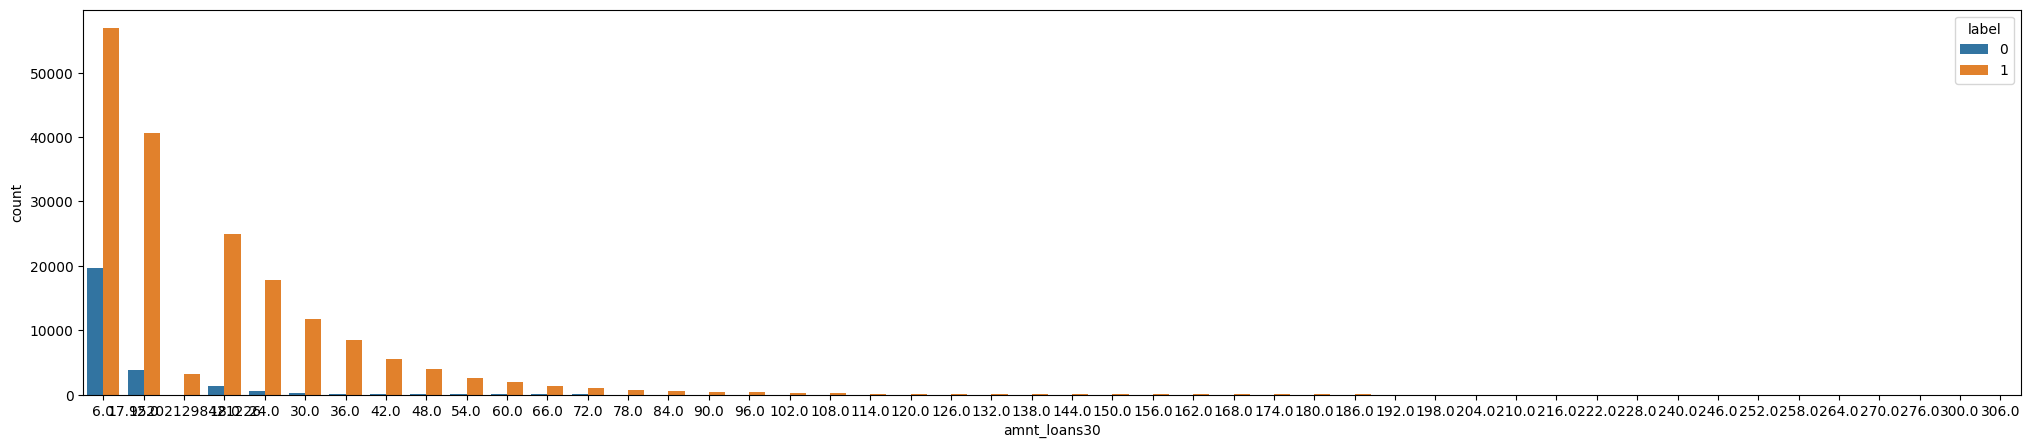

In [63]:
plt.figure(figsize=(25,5))
sns.countplot(x='amnt_loans30',hue='label',data=df)
plt.show()

- Total amount of loans taken by user in last 90 days, in which 0.07 has high count than others.
- And It has high loan defaulting count than others.

# 4. Correlation of the features with target column

In [64]:
df.corr()['label'].sort_values()

medianmarechprebal30   -0.012883
fr_da_rech90           -0.005406
aon                    -0.003785
fr_da_rech30           -0.000013
maxamnt_loans30         0.000248
fr_ma_rech30            0.001330
last_rech_date_da       0.001711
cnt_da_rech90           0.002720
last_rech_date_ma       0.003728
cnt_da_rech30           0.003760
cnt_loans90             0.005036
day                     0.006825
medianamnt_loans30      0.044225
payback90               0.049183
rental30                0.058085
rental90                0.075521
maxamnt_loans90         0.084144
fr_ma_rech90            0.084385
medianamnt_ma_rech90    0.120855
last_rech_amt_ma        0.131804
sumamnt_ma_rech90       0.140682
medianamnt_ma_rech30    0.141490
month                   0.154949
daily_decr90            0.166150
daily_decr30            0.168298
sumamnt_ma_rech30       0.202828
cnt_loans30             0.204518
amnt_loans30            0.205073
cnt_ma_rech90           0.236392
cnt_ma_rech30           0.237331
label     

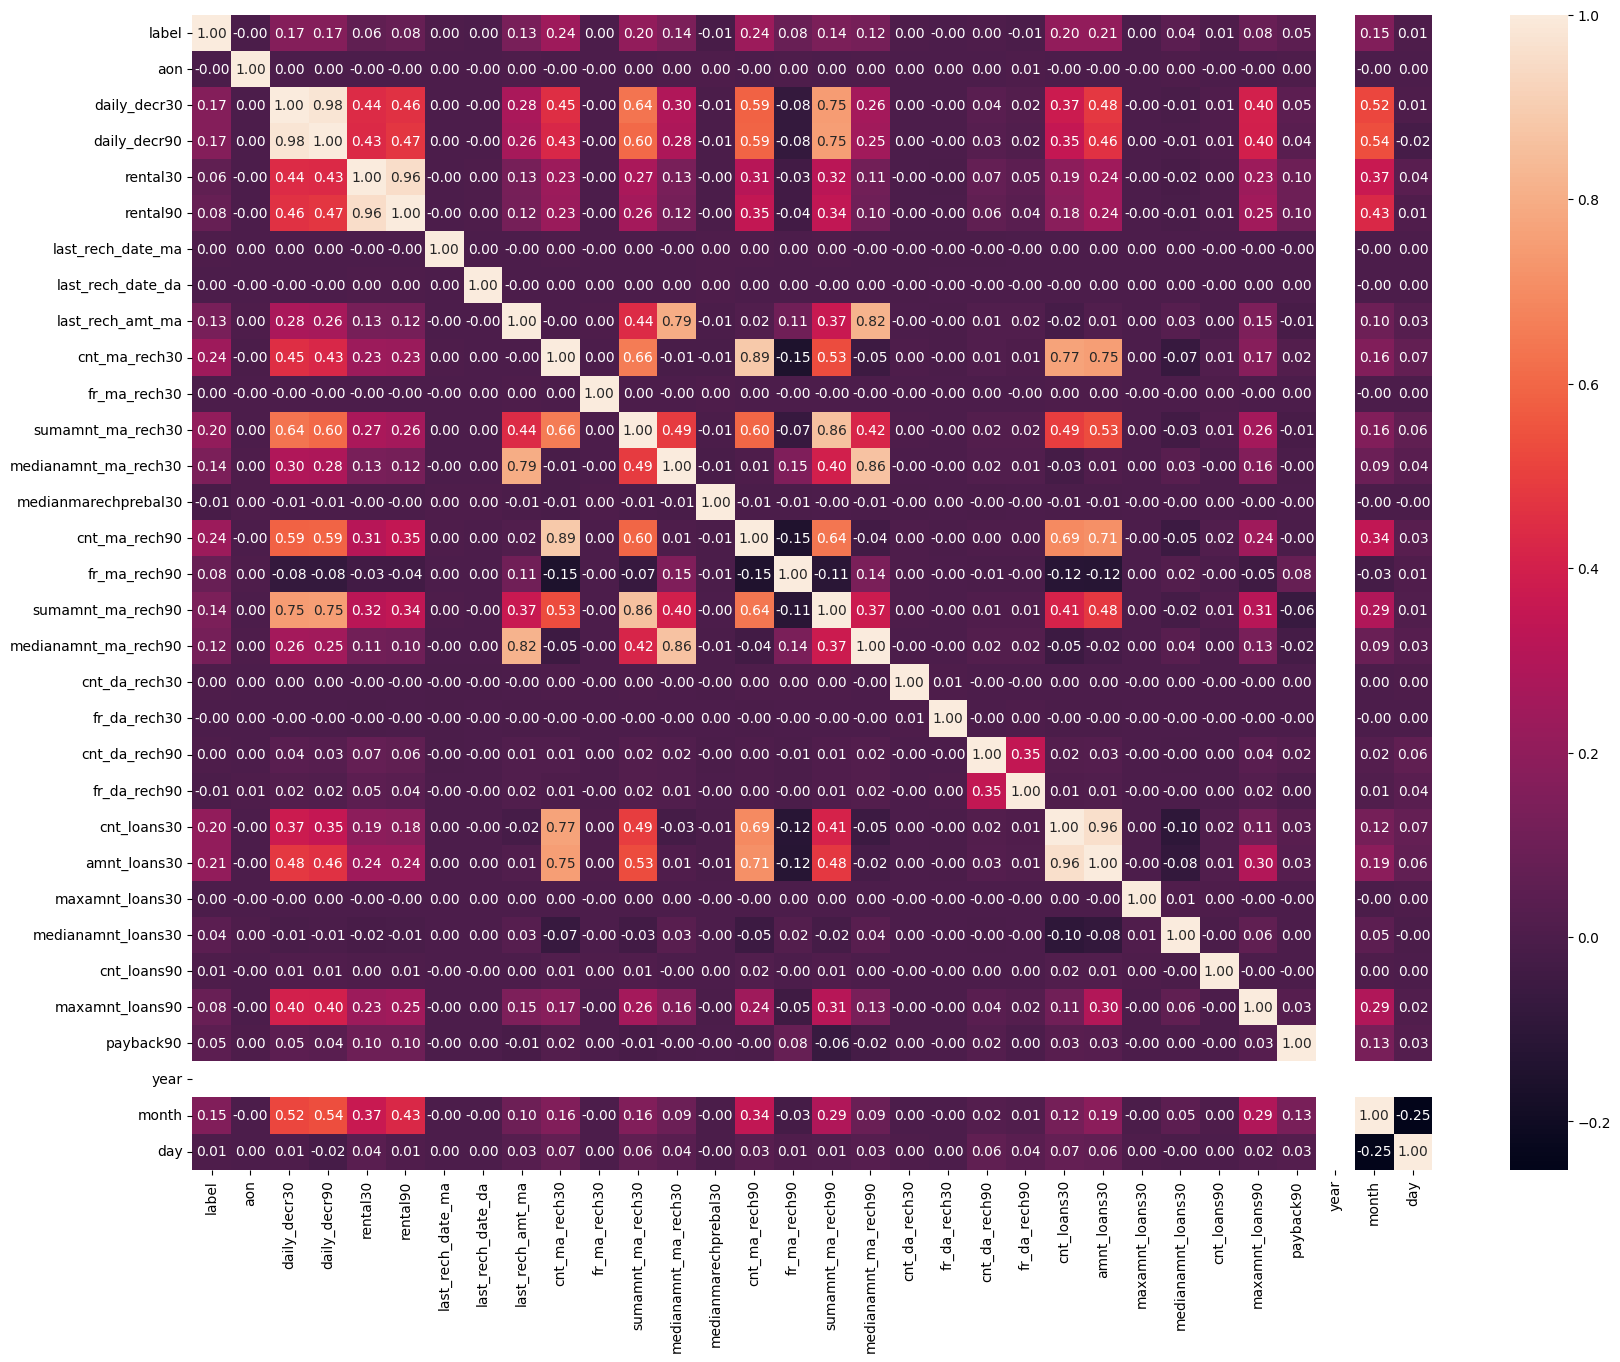

In [65]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True, fmt ='.2f')
plt.show()

### Outcome of Correlation
- daily_decr30 has 17% positive correlation with target column.
- cnt_ma_rech30 has 24% positive correlation with target column.
- cnt_ma_rech90 has 24% positive correlation with target column.
- cnt_loans30 has 20% positive correlation with target column.
- amt_loan30 has 21% positive correlation with target columns.
- month has 15% positive correlation with target column.

### Features correlation to each other

- daily_decr30 have 98%, 75% positive correlation with daily_decr90 and sumamnat_ma_rech90.
- rental90 has 98% positive correlation with rental30.
- last_rech_amt_ma has 82% and 79% positive correlation with medianamnt_ma_rech90 and medianamnt_ma_rech30.
- cnt_ma_rech30 has 89% positive correlation with cnt_ma_rech90.
- cnt_loan30 has 77% positive correlation with cnt_ma_rech30.
- sumamnt_ma_rech30 has 86% positive correlation with sumamnt_ma_rech90.
- medianamnt_ma_rech90 has 86% positive correlation with medianamnt_ma_rech30.

# 5.Visualizing correlation of feature columns with label column

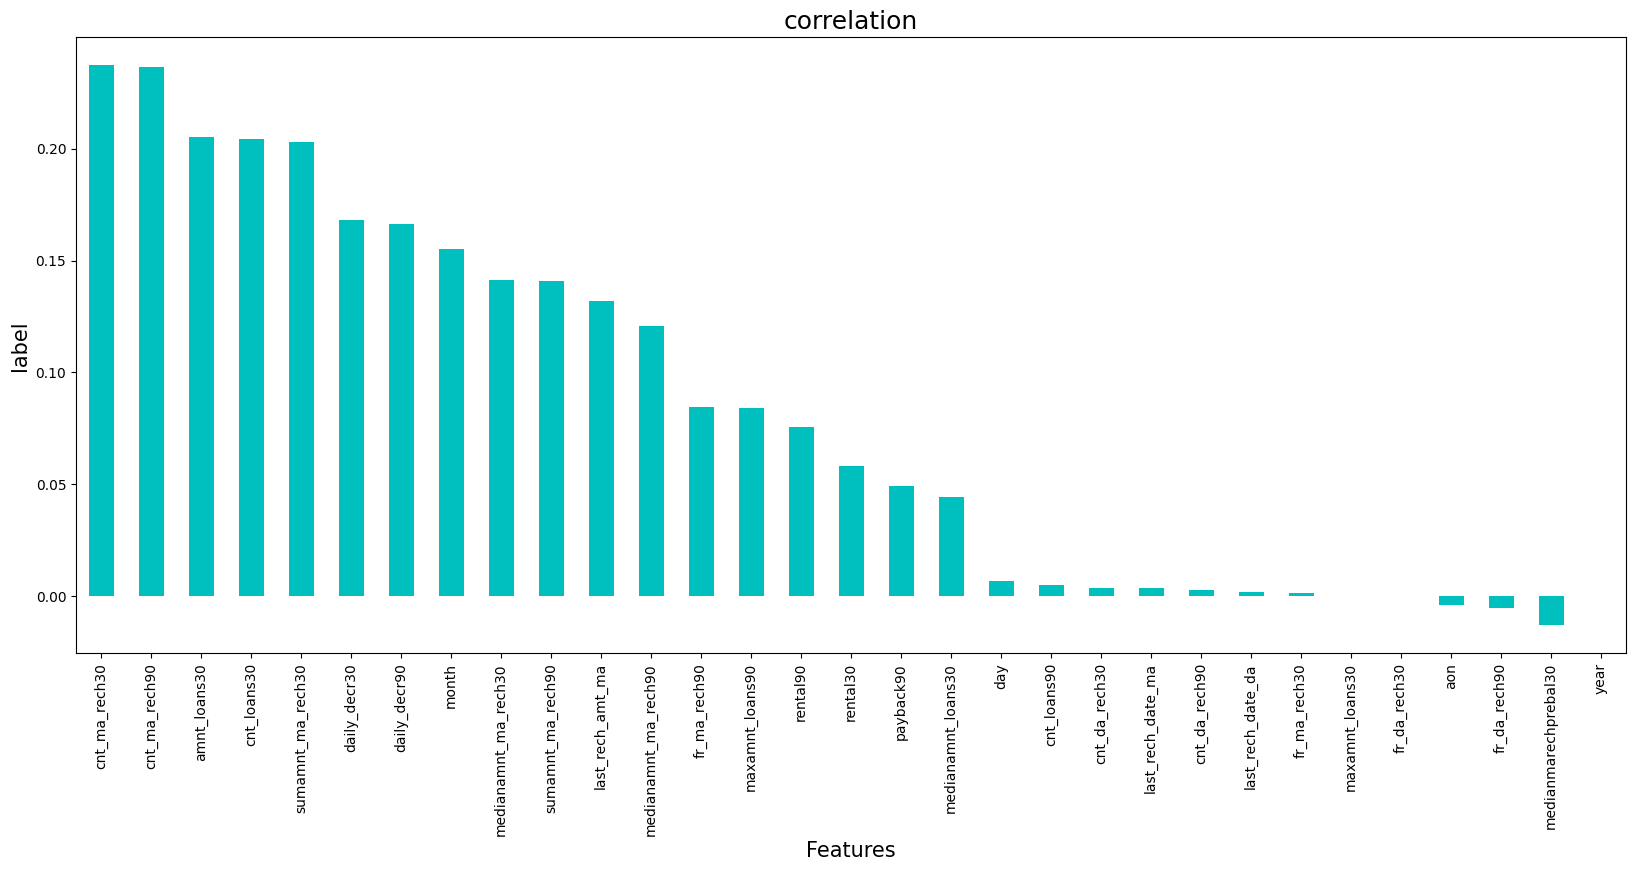

In [66]:
plt.figure(figsize = (20,8))
df.corr()['label'].sort_values(ascending = False).drop(['label']).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=15)
plt.ylabel('label',fontsize=15)
plt.title('correlation',fontsize = 18)
plt.show()

- It is observed that cnt_ma_rech30, cnt_ma_rech90, amnt_loans30 and sumamnt_ma_rech30 have the highest positive correlation with label.
- year, medianmarechprebal30 and fr_do_rech90 have the highest negative correlation with label.

In [ ]:
Checkin data skewness

In [67]:
df.skew()

label                   -2.270254
aon                     10.392949
daily_decr30             3.946230
daily_decr90             4.252565
rental30                 4.521929
rental90                 4.437681
last_rech_date_ma       14.790974
last_rech_date_da       14.814857
last_rech_amt_ma         3.781149
cnt_ma_rech30            3.283842
fr_ma_rech30            14.772833
sumamnt_ma_rech30        6.386787
medianamnt_ma_rech30     3.512324
medianmarechprebal30    14.767538
cnt_ma_rech90            3.425254
fr_ma_rech90             2.285423
sumamnt_ma_rech90        5.185374
medianamnt_ma_rech90     3.752706
cnt_da_rech30           17.839438
fr_da_rech30            14.783041
cnt_da_rech90           27.839219
fr_da_rech90            29.044881
cnt_loans30              2.759445
amnt_loans30             3.021517
maxamnt_loans30         17.658052
medianamnt_loans30       4.693409
cnt_loans90             16.593670
maxamnt_loans90          1.678304
payback90                6.899951
year          

- Outcome of the skewness: Skewness threshold is taken is +/-0.65.
- We can see, all features are having some skewness.

# 6. Checking Distribution of data

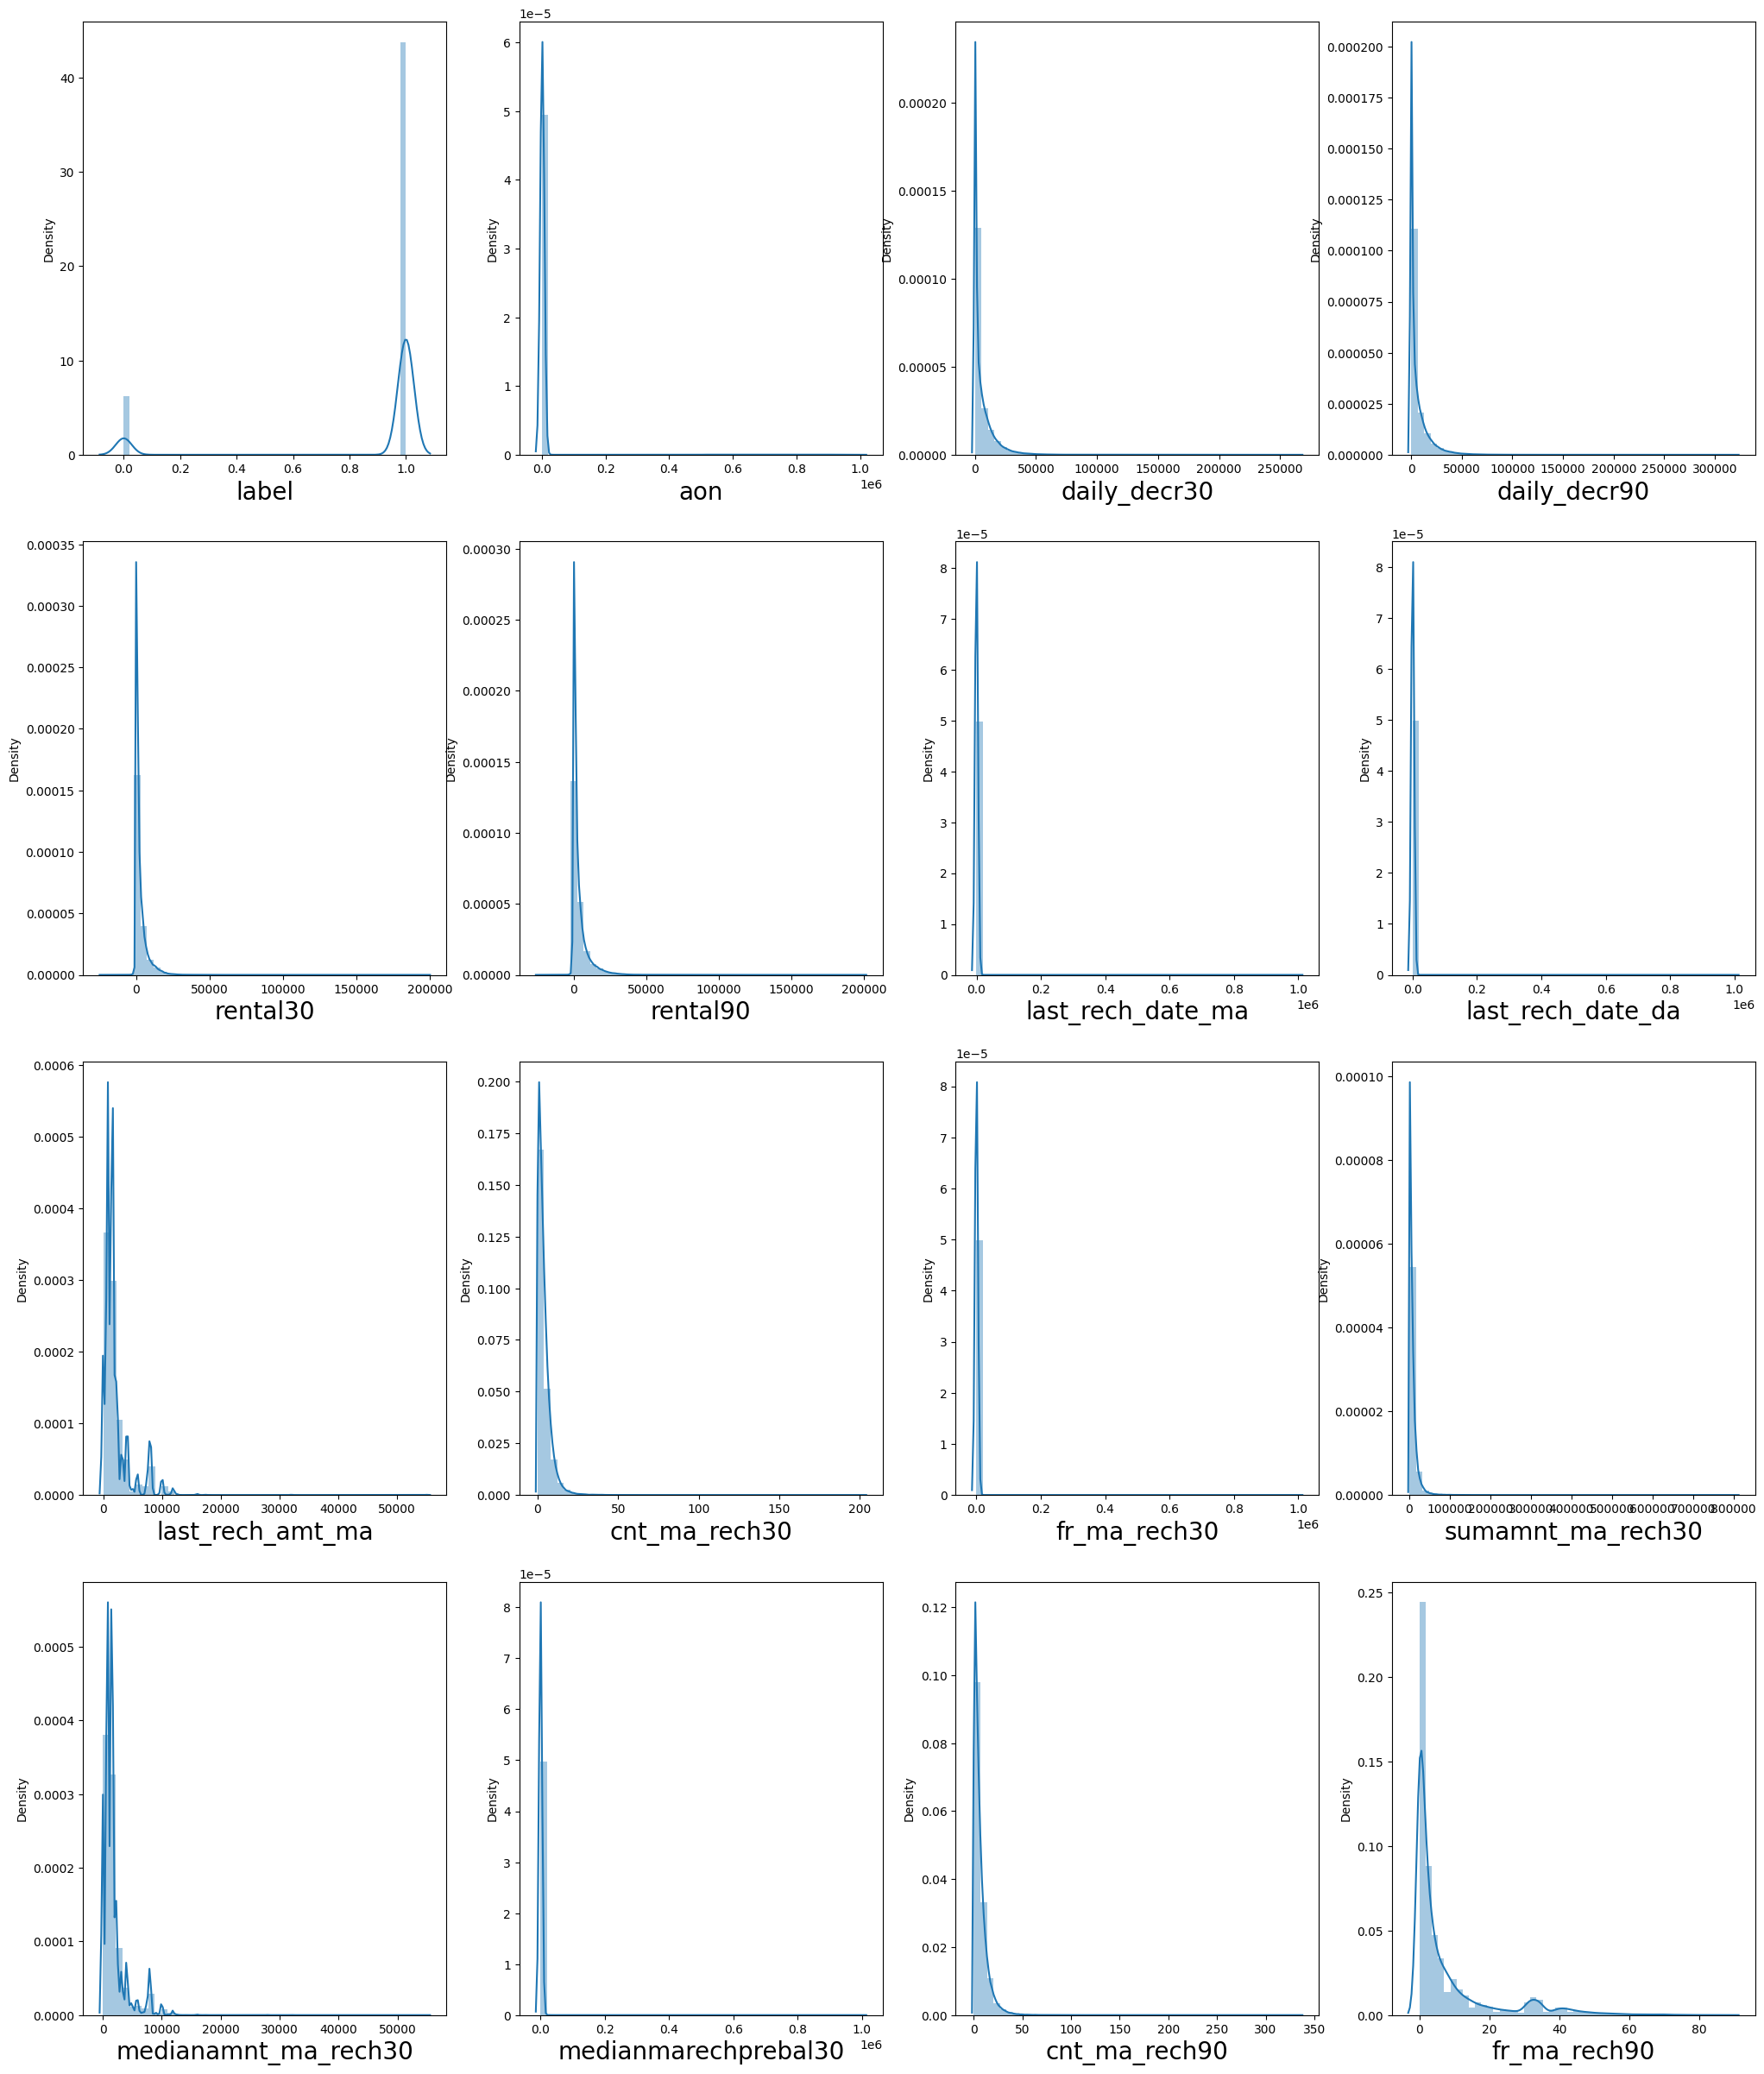

In [113]:
plt.figure(figsize=(25,30))               # gives figsize 
plotnumber = 1

for column in df:                       # apply for loop for iterating feature one by one
    if plotnumber <=16:                   # give the condition it plot 16 displot
        ax = plt.subplot(4,4,plotnumber)  # number of plot plot so give it subplot number
        sns.distplot(df[column])        # plot distplot by using seaborn
        plt.xlabel(column, fontsize=20)   # gives xlavel and fontsize
    plotnumber +=1
plt.show()

# 7.Checking Outliers

In [ ]:
df.shape

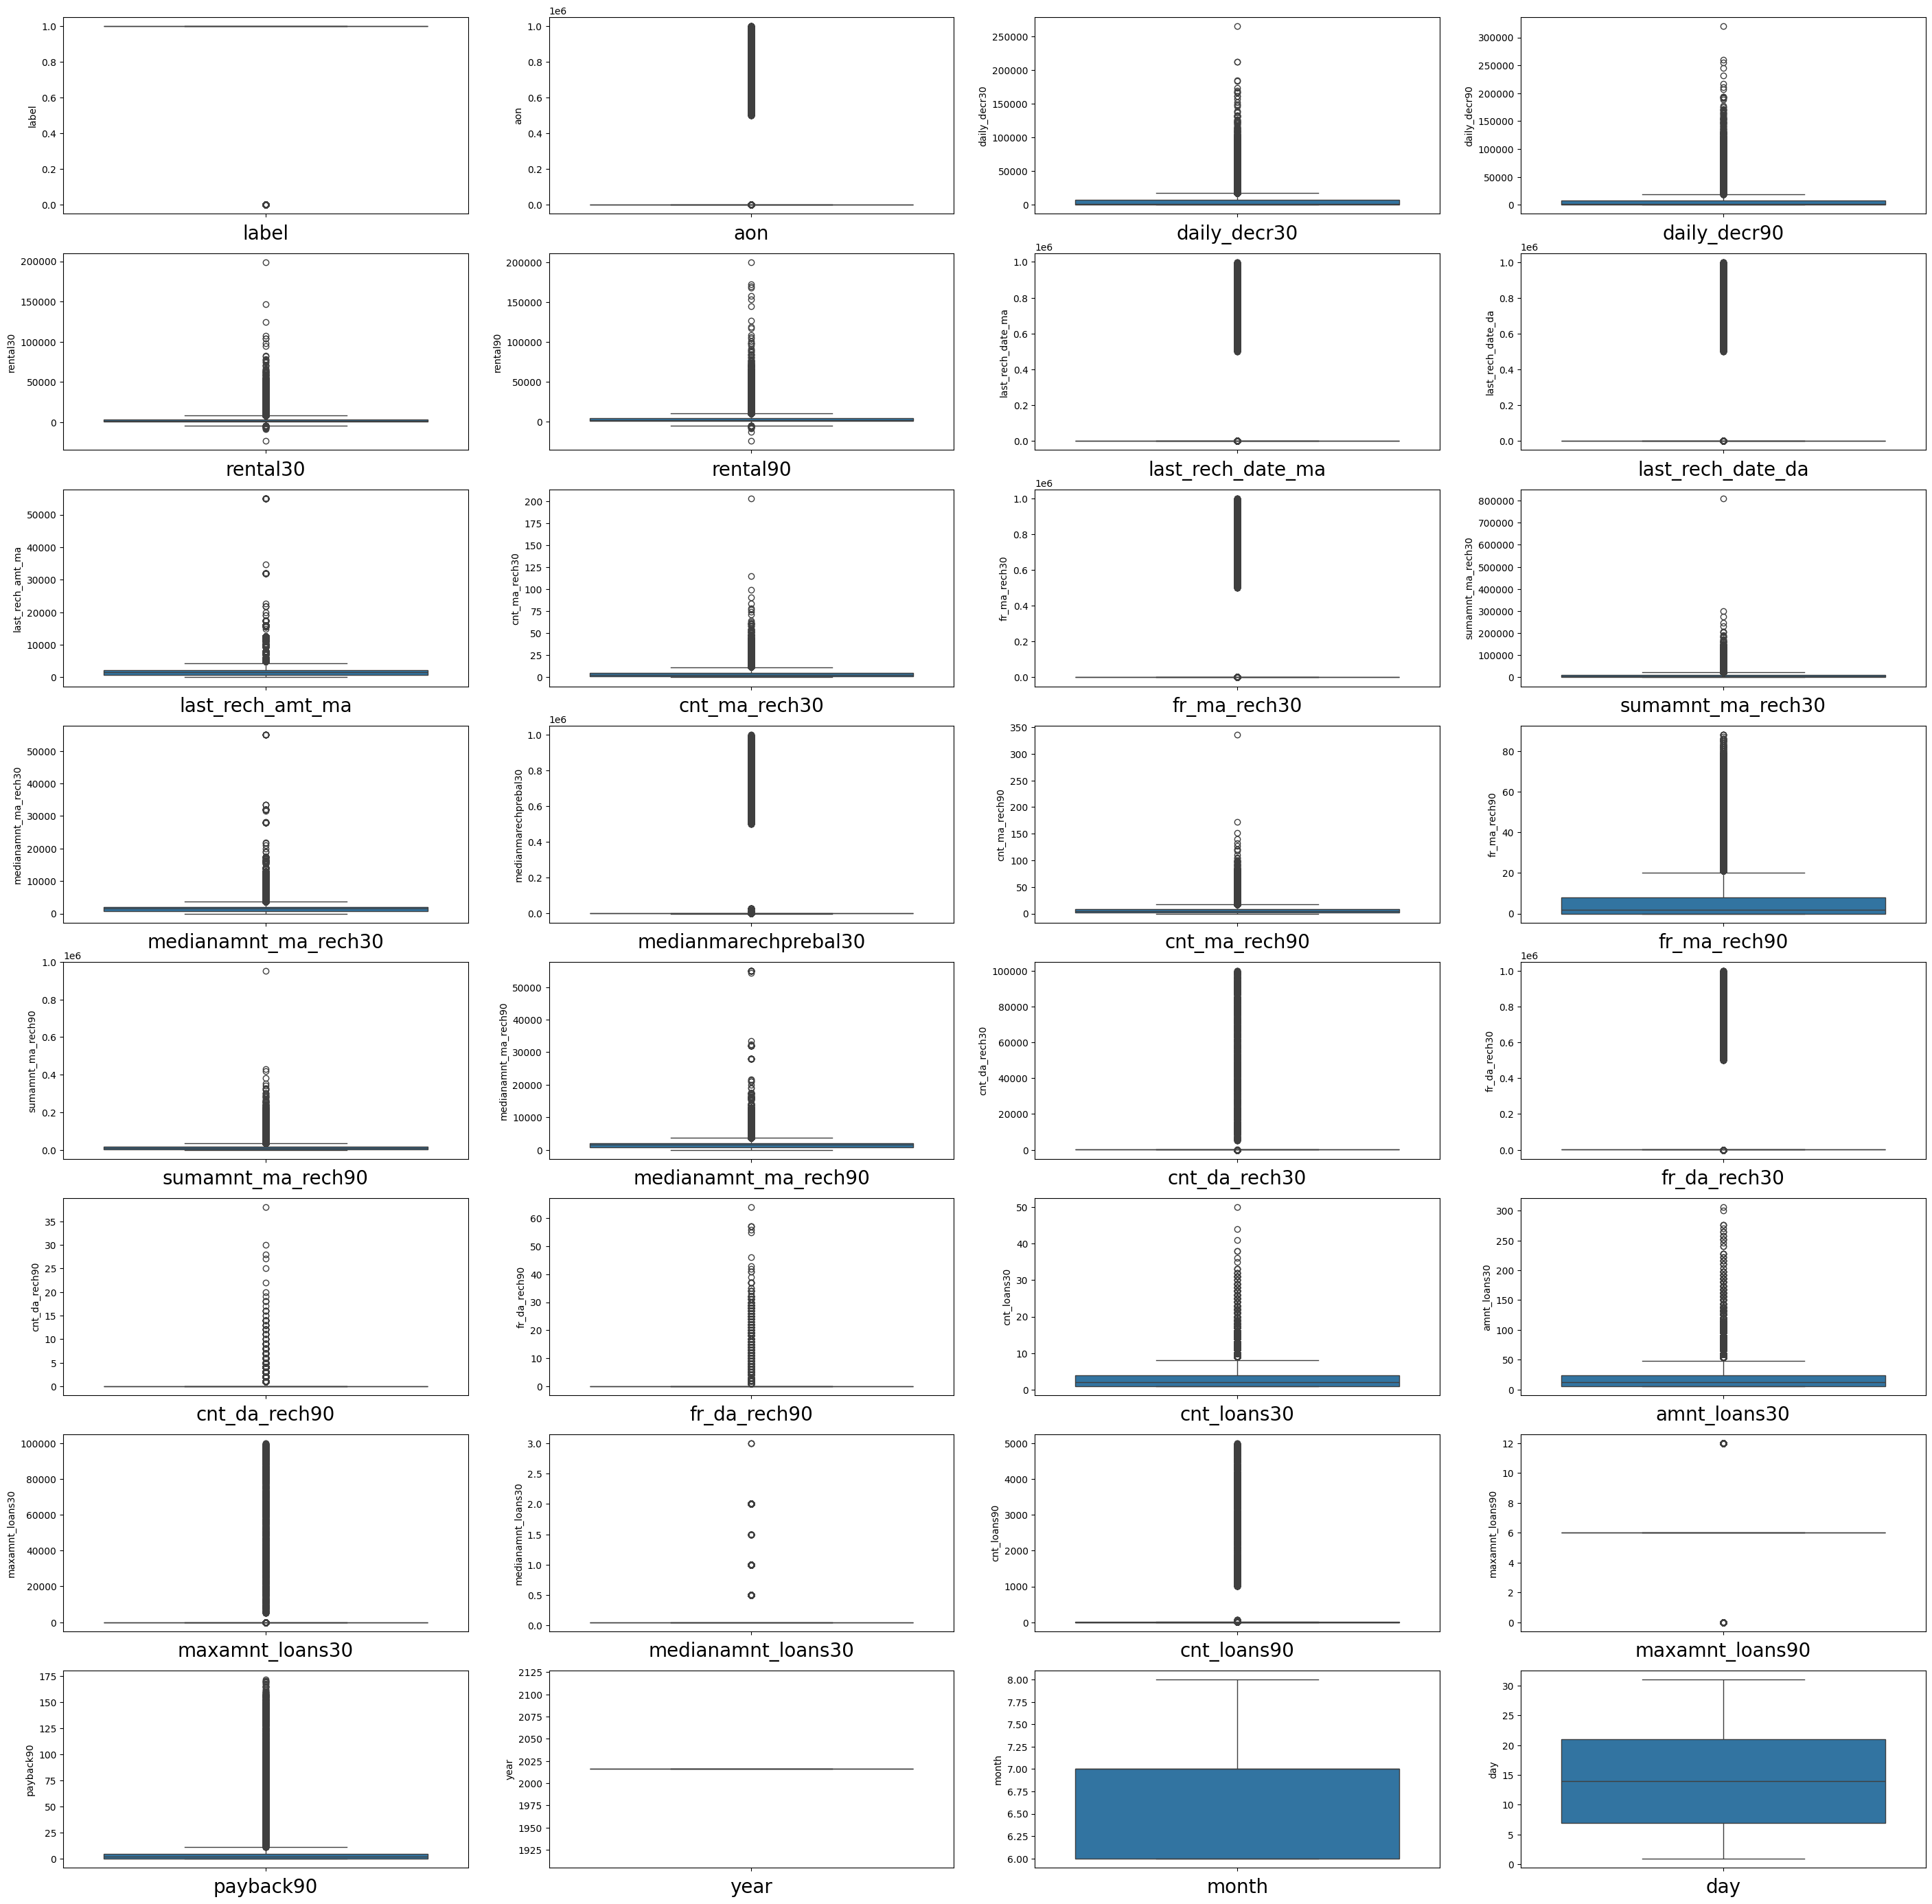

In [68]:
plt.figure(figsize=(35,35))
plotnumber = 1

for column in df:
    if plotnumber <=32:
        plt.subplot(8,4,plotnumber)
        ax = sns.boxplot(data=df[column])
        plt.xlabel(column, fontsize=20)
    plotnumber +=1
plt.show()

- We can see almost all features are having outliers except year, month, day.
- But i am only removing outliers only those features are having continuous data.

## 7.1 Removing Outliers

In [69]:
from scipy.stats import zscore

z_score = zscore(df[['aon','daily_decr30','daily_decr90','rental30','rental90','sumamnt_ma_rech30','medianmarechprebal30',]])
abs_z_score = np.abs(z_score)    # Apply the formula and get the scaled data

filtering_entry = (abs_z_score  < 3).all(axis=1)

df1 = df[filtering_entry]

In [70]:
df1.shape

(194998, 32)

In [71]:
df.shape

(209593, 32)

## 7.2 Percentage of dataloss

In [72]:
data_loss = ((209593 - 194998)/209593*100)
print(data_loss,'%')

6.963495918279714 %


# 8.Checking Multicollinearity

In [75]:
x = df1.drop(columns=['label'],axis=1)
y = df1['label']

In [76]:
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
scaler= StandardScaler()
scaled_X = scaler.fit_transform(x)
vif = pd.DataFrame()
vif["Features"] = x.columns
vif['vif'] = [variance_inflation_factor(scaled_X,i) for i in range(scaled_X.shape[1])]
vif

,Features,vif
0,aon,1.021792
1,daily_decr30,29.846027
2,daily_decr90,33.063554
3,rental30,12.056852
4,rental90,13.270355
5,last_rech_date_ma,1.000104
6,last_rech_date_da,1.000085
7,last_rech_amt_ma,3.755641
8,cnt_ma_rech30,12.815980
9,fr_ma_rech30,1.000099


- If VIF > 10, It means multicollinearity is present.
- MultiCollinearity are exists in amnt_loans30,cnt_loans30, cnt_ma_rech90, daily_decr90,daily_decr30, sumamnt_ma_rech30, nt_ma_rech30,rental90, rental30,daily_decr90 and daily_decr30, Based on ANOVA F scores.

### 8.2 Droping columns whose having multicollinearity

In [77]:
df1.drop(columns=['amnt_loans30','cnt_loans30','sumamnt_ma_rech30','cnt_ma_rech30','rental90','rental30','daily_decr90','daily_decr90','year'],axis=1,inplace=True)


In [78]:
df1.head()

,label,aon,daily_decr30,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,fr_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,...,fr_da_rech30,cnt_da_rech90,fr_da_rech90,maxamnt_loans30,medianamnt_loans30,cnt_loans90,maxamnt_loans90,payback90,month,day
0,0,272.0,3055.050000,2.0,0.0,1539,21.0,1539.0,7.500000,2,...,3749.494447,0.041495,0.045712,6.0,0.054029,2.0,6,29.000000,7,20
1,1,712.0,12122.000000,20.0,0.0,5787,0.0,5787.0,61.040000,1,...,3749.494447,0.041495,0.045712,12.0,0.054029,1.0,12,0.000000,8,10
2,1,535.0,1398.000000,3.0,0.0,1539,0.0,1539.0,66.320000,1,...,3749.494447,0.041495,0.045712,6.0,0.054029,1.0,6,0.000000,8,19
3,1,241.0,21.228000,41.0,0.0,947,0.0,0.0,3851.927942,1,...,3749.494447,0.041495,0.045712,6.0,0.054029,2.0,6,0.000000,6,6
4,1,947.0,150.619333,4.0,0.0,2309,2.0,2309.0,29.000000,8,...,3749.494447,0.041495,0.045712,6.0,0.054029,7.0,6,2.333333,6,22


In [79]:
x = df1.drop(columns=['label'],axis=1)
y = df1['label']

# 9. Selecting Kbest Features

In [80]:
from sklearn.feature_selection import SelectKBest, f_classif
bestfeat = SelectKBest(score_func = f_classif, k = 'all')
fit = bestfeat.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

fit = bestfeat.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
dfcolumns.head()
featureScores = pd.concat([dfcolumns,dfscores],axis = 1)
featureScores.columns = ['Feature', 'Score']
print(featureScores.nlargest(35,'Score'))

                 Feature         Score
7   medianmarechprebal30  20310.017585
8          cnt_ma_rech90  13190.437947
1           daily_decr30   7136.667887
10     sumamnt_ma_rech90   4606.333368
6   medianamnt_ma_rech30   4200.779060
21                 month   4109.161929
4       last_rech_amt_ma   3560.441368
11  medianamnt_ma_rech90   3013.656856
9           fr_ma_rech90   1605.303124
0                    aon   1323.177682
19       maxamnt_loans90   1058.781486
20             payback90    494.479887
17    medianamnt_loans30    419.086098
22                   day     14.696469
15          fr_da_rech90      6.073967
18           cnt_loans90      3.989108
14         cnt_da_rech90      3.225446
2      last_rech_date_ma      2.586836
12         cnt_da_rech30      2.257612
3      last_rech_date_da      0.346444
5           fr_ma_rech30      0.273417
13          fr_da_rech30      0.007951
16       maxamnt_loans30      0.002130



- We can see the features with their scores, and most of the features are correlated with the label. I am dropping few features because feature selection is typically used when there are a large number of columns in the data. However, we only have 24 columns, which is quite sufficient.

## 9.1 Selecting best features based on their scores

In [81]:
x_best = x.drop(columns=['fr_da_rech30','fr_da_rech90','cnt_da_rech30']).copy()

In [ ]:
Data Skewness Before removing

In [82]:
df.skew()

label                   -2.270254
aon                     10.392949
daily_decr30             3.946230
daily_decr90             4.252565
rental30                 4.521929
rental90                 4.437681
last_rech_date_ma       14.790974
last_rech_date_da       14.814857
last_rech_amt_ma         3.781149
cnt_ma_rech30            3.283842
fr_ma_rech30            14.772833
sumamnt_ma_rech30        6.386787
medianamnt_ma_rech30     3.512324
medianmarechprebal30    14.767538
cnt_ma_rech90            3.425254
fr_ma_rech90             2.285423
sumamnt_ma_rech90        5.185374
medianamnt_ma_rech90     3.752706
cnt_da_rech30           17.839438
fr_da_rech30            14.783041
cnt_da_rech90           27.839219
fr_da_rech90            29.044881
cnt_loans30              2.759445
amnt_loans30             3.021517
maxamnt_loans30         17.658052
medianamnt_loans30       4.693409
cnt_loans90             16.593670
maxamnt_loans90          1.678304
payback90                6.899951
year          

## 9.2 Data After Removing Skewness

In [83]:
from sklearn.preprocessing import power_transform
x = power_transform(x_best,method='yeo-johnson')

In [84]:
trans = pd.DataFrame(x)
trans.skew()

0       0.306198
1      -2.136188
2      -5.108870
3    -103.410825
4      -0.090324
5       0.174630
6      -0.223453
7      -0.194728
8      -0.006456
9       0.145041
10     -0.033939
11     -0.073629
12      6.009359
13     -1.786121
14      3.431876
15      0.248290
16      0.416247
17      0.232585
18      0.098272
19     -0.160265
dtype: float64

In [85]:
x = scaler.fit_transform(x)

- Feature Scalling are used convert features in particular range because if we feed the data without scalling. model can give imporantce of those feature whose having maximum weight. So avoiding this we used scaling.
- I used StandardScaler it convert the data in a such way that their mean is 0 and standard of deviation 1. And it good if we have outlirs so I used it.

In [86]:
x

array([[-7.22296123e-01,  4.95037100e-01, -2.36812704e-02, ...,
         1.76724527e+00,  4.74705534e-01,  7.07721937e-01],
       [ 2.53515638e-01,  1.25199246e+00,  1.88914095e-01, ...,
        -9.93808024e-01,  1.52195414e+00, -4.14892215e-01],
       [-1.04965469e-01,  1.46451745e-01,  1.31331149e-03, ...,
        -9.93808024e-01,  1.52195414e+00,  6.06495297e-01],
       ...,
       [ 8.02633368e-01,  1.23748459e+00,  1.31331149e-03, ...,
         7.75230563e-01,  4.74705534e-01,  1.54820791e+00],
       [ 1.93392250e+00,  1.27063915e+00, -2.36812704e-02, ...,
         1.34287169e+00,  4.74705534e-01,  1.18859626e+00],
       [ 1.71149918e+00,  6.86790944e-01,  1.35215164e-01, ...,
        -9.93808024e-01,  4.74705534e-01, -8.23096254e-01]])

## 9.3 Balancing Dataset

In [87]:
from imblearn.over_sampling import SMOTE as sm

smt_x,smt_y = sm().fit_resample(x,y)

- See data is imbalanced so we need to balanced it for avoiding the biasness in our result.
- For this I used SMOTE is a oversampling technique in which it enhancing the minority observation.

In [88]:
smt_y.value_counts()

label
0    169697
1    169697
Name: count, dtype: int64

# 10. Building Model

In [89]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

## 10.1 LogisticRegression
### Finding Best random State

- Random state is increasing the performance of the model so that finding appropriate random state is very important.
- I find the random state for both model diffrently.

In [90]:
# finding Best Random state
maxAccu=0
maxRS=0

for i in range(1, 1000):
    x_train, x_test, y_train, y_test = train_test_split(smt_x, smt_y, test_size=0.3, random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    accuracy = accuracy_score(y_test, pred)
    
    if accuracy>maxAccu:
        maxAccu=accuracy
        maxRS=i

print("Best Accuracy score is", maxAccu,"on Random State", maxRS)

Best Accuracy score is 0.7617340574941809 on Random State 743


In [91]:
x_train, x_test, y_train, y_test = train_test_split(smt_x, smt_y, test_size=0.3, random_state=743)

In [92]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

y_pred = lr.predict(x_test)
accuracy_score(y_test,y_pred)

0.7617340574941809

###  Which accuracy metric used ?
- Here I used "Accuracy" as metric to select model, because accuracy will used when we have balanced the data set. In this I balanced data so I can used it as accuracy metric to considering or selecting the model.
- If I used imbalanced data that time we can used "Precision", 'Recall" and "F1 score".
- "Precison" used whenever your False Positive much important then we can used it. In this problem we can used it if data is imabalnced.
- "Recall" used whenever your False Negative much more important then used Recall.
- In some problem FP and FN both are very very important then we can used "F1 Score".

## 10.1.1 Cross - validation for logistic Regression

- As we know that cross validation is used to estimate the performance of ML model. It is used to protect against overfitting in a predictive model.
- So I used the cross validation for preventing the Overfitting.

In [93]:
from sklearn.model_selection import cross_val_score

pred_lr = lr.predict(x_test)
accu = accuracy_score(y_test,pred_lr)
for j in range(4,10):
    cross = cross_val_score(lr,x,y,cv=j)
    lsc = cross.mean()
    print("At cv:-",j)
    print('Cross validation score is:-',lsc*100)
    print('accuracy_score is:-',accu*100)
    print('\n')

At cv:- 4
Cross validation score is:- 87.39730722155511
accuracy_score is:- 76.1734057494181


At cv:- 5
Cross validation score is:- 87.373717366849
accuracy_score is:- 76.1734057494181


At cv:- 6
Cross validation score is:- 87.3932044930771
accuracy_score is:- 76.1734057494181


At cv:- 7
Cross validation score is:- 87.3932050039615
accuracy_score is:- 76.1734057494181


At cv:- 8
Cross validation score is:- 87.39833313345662
accuracy_score is:- 76.1734057494181


At cv:- 9
Cross validation score is:- 87.40192324255968
accuracy_score is:- 76.1734057494181




In [94]:
lsscore_selected = cross_val_score(lr,x,y,cv=9).mean()
print("The cv score is: ",lsscore_selected,"\nThe accuracy score is: ",accu)

The cv score is:  0.8740192324255968 
The accuracy score is:  0.7617340574941809


In [95]:
def metric_score(clf, x_train_ns,x_test,y_train_ns,y_test, train=True):
    if train:
        
        y_pred = clf.predict(x_train_ns)

        print("\n========================== Train Result=============================")

        print(f"Accuracy Score: {accuracy_score(y_train_ns, y_pred) * 100:.2f}%")

    
    elif train==False:
        pred = clf.predict(x_test)
        
        print("\n==========================Test Result=======================")
        print(f"Accuracy Score: {accuracy_score(y_test,pred) * 100:.2f}%")
        
        print("\n \n Test Classification Report \n", classification_report(y_test, pred, digits=2))
        
        print('\n Confusion Matrix: \n',confusion_matrix(y_test,pred))

## 10.2 XGBOOST

- XGBoost (Extreme Gradient Boosting) is a powerful machine learning algorithm based on gradient boosting principles. It is known for its high performance, efficiency, and scalability, making it widely used in machine learning competitions. XGBoost builds an ensemble of decision trees by iteratively adding models that correct the errors of previous ones.
- It incorporates techniques like regularization (L1 and L2) to prevent overfitting, making it robust on various types of data. XGBoost is particularly effective for structured/tabular data and excels in classification and regression tasks

In [96]:
from xgboost import XGBClassifier

In [ ]:
# finding Best Random state
maxAccu=0
maxRS=0

for i in range(1, 1000):
    x_train, x_test, y_train, y_test = train_test_split(smt_x, smt_y, test_size=0.3, random_state=i)
    xgb=XGBClassifier()
    xgb.fit(x_train, y_train)
    pred = xgb.predict(x_test)
    accuracy = accuracy_score(y_test, pred)
    
    if accuracy>maxAccu:
        maxAccu=accuracy
        maxRS=i

print("Best Accuracy score is", maxAccu,"on Random State", maxRS)

In [97]:
x_train, x_test, y_train, y_test = train_test_split(smt_x, smt_y, test_size=0.3, random_state=97)

In [98]:
#import xgboost as xgb
xgb = XGBClassifier()

xgb.fit(x_train,y_train)

metric_score(xgb,x_train,x_test,y_train, y_test, train=True)

metric_score(xgb,x_train,x_test,y_train, y_test, train=False)


========================== Train Result=============================
Accuracy Score: 95.11%

==========================Test Result=======================
Accuracy Score: 94.59%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.95      0.94      0.95     50813
           1       0.94      0.95      0.95     51006

    accuracy                           0.95    101819
   macro avg       0.95      0.95      0.95    101819
weighted avg       0.95      0.95      0.95    101819


 Confusion Matrix: 
 [[47636  3177]
 [ 2332 48674]]


## 10.2.1 Cross - Validation for XGBOOST

In [99]:

pred_xgb = xgb.predict(x_test)
accu = accuracy_score(y_test,pred_xgb)
for j in range(4,10):
    cross = cross_val_score(xgb,x,y,cv=j)
    lsc = cross.mean()
    print("At cv:-",j)
    print('Cross validation score is:-',lsc*100)
    print('accuracy_score is:-',accu*100)
    print('\n')

At cv:- 4
Cross validation score is:- 91.92863588523315
accuracy_score is:- 94.58941847788724


At cv:- 5
Cross validation score is:- 91.931199498212
accuracy_score is:- 94.58941847788724


At cv:- 6
Cross validation score is:- 91.94248089684812
accuracy_score is:- 94.58941847788724


At cv:- 7
Cross validation score is:- 91.93171255279623
accuracy_score is:- 94.58941847788724


At cv:- 8
Cross validation score is:- 91.93171138645005
accuracy_score is:- 94.58941847788724


At cv:- 9
Cross validation score is:- 91.9532522000709
accuracy_score is:- 94.58941847788724




In [100]:
lsscore_selected = cross_val_score(xgb,x,y,cv=9).mean()
print("The cv score is: ",lsscore_selected,"\nThe accuracy score is: ",accu)

The cv score is:  0.919532522000709 
The accuracy score is:  0.9458941847788723


## 11. ROC_AUC Curve

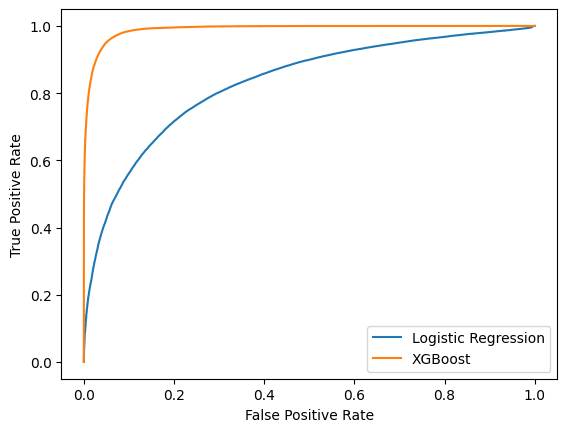

In [104]:
from sklearn.metrics import roc_curve, roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt

# Assuming you have two classifiers: lr (Logistic Regression) and xgb (XGBoost)
# Assuming you have x_train (features) and y_train (true labels)

# Get ROC curve data for Logistic Regression
y_pred_prob_lr = lr.predict_proba(x_train)[:, 1]  # Probability for the positive class
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_train, y_pred_prob_lr)

# Get ROC curve data for XGBoost
y_pred_prob_xgb = xgb.predict_proba(x_train)[:, 1]  # Probability for the positive class
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_train, y_pred_prob_xgb)

# Plot ROC curve for Logistic Regression
disp = RocCurveDisplay(fpr=fpr_lr, tpr=tpr_lr).plot()

# Plot ROC curve for XGBoost on the same axis
RocCurveDisplay(fpr=fpr_xgb, tpr=tpr_xgb).plot(ax=disp.ax_)

# Add legend and show plot
plt.legend(["Logistic Regression", "XGBoost"], prop={'size': 10}, loc='lower right')
plt.show()


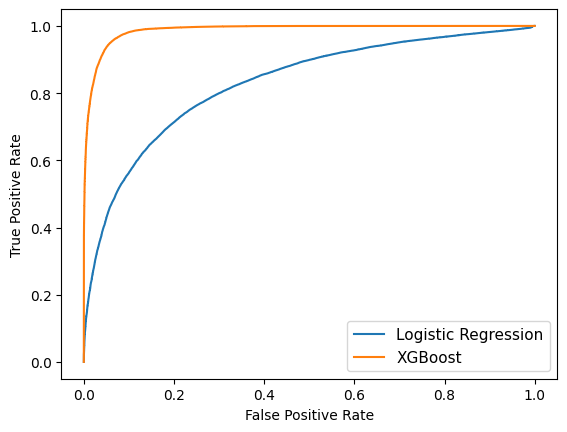

In [105]:
from sklearn.metrics import roc_curve, roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt

# Get ROC curve data for Logistic Regression
y_pred_prob_lr = lr.predict_proba(x_test)[:, 1]  # Probability for the positive class
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_prob_lr)

# Get ROC curve data for XGBoost
y_pred_prob_xgb = xgb.predict_proba(x_test)[:, 1]  # Probability for the positive class
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_pred_prob_xgb)

# Plot ROC curve for Logistic Regression
disp = RocCurveDisplay(fpr=fpr_lr, tpr=tpr_lr).plot()

# Plot ROC curve for XGBoost on the same axis
RocCurveDisplay(fpr=fpr_xgb, tpr=tpr_xgb).plot(ax=disp.ax_)

# Add legend and show plot
plt.legend(["Logistic Regression", "XGBoost"], prop={'size': 11}, loc='lower right')
plt.show()


# 12. Selecting Best Model


- Based on comparing Accuracy Score results with Cross Validation results, it is determined XGBoost classifier is the best model. It has least difference between accuracy score and cross validation.
- As I say before that, Cross Validation is used to preventing the oferfitting,XGBoostclassifier has good Cross Validation Score comparing Random Forest.
- Area under the cureve also same for training and testing so that this model is more generalize than others.

# 13. Hyperparameter Tuning

- We have two way to do 1. GridSearchCV 2 . RandomizedSearchCV
- Here I Used GridSearchCV because it does a exhaustive generation of combination of different parameters passed. Using cross validation score, GridSearchCV return the combination of hyperparameter for which the model is performing the best.

In [106]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [107]:
param = {'learning_rate':[0.05,0.1,0.15,0.20,0.25,0.30],
        'max_depth':[3,4,5,6,8,10,12,15],
        'min_child_weight':[1,3,5,7],
        'gamma':[0.0,0.1,0.2,0.3,0.4],
        'colsample_bytree':[0.3,0.4,0.5,0.7]}

In [108]:
x_train, x_test, y_train, y_test = train_test_split(smt_x, smt_y, test_size=0.3, random_state=97)

In [109]:
rd = RandomizedSearchCV(xgb, param_distributions=param)

In [110]:
rd.fit(x_train,y_train)

print('Best_params  = > ',rd.best_params_)

Best_params  = >  {'min_child_weight': 7, 'max_depth': 15, 'learning_rate': 0.25, 'gamma': 0.2, 'colsample_bytree': 0.5}


In [111]:

xgb = XGBClassifier(min_child_weight=1, max_depth=25, learning_rate=0.2, gamma=0.2, colsample_bytree=0.7)

xgb.fit(x_train,y_train)

metric_score(xgb,x_train,x_test,y_train, y_test, train=True)

metric_score(xgb,x_train,x_test,y_train, y_test, train=False)


========================== Train Result=============================
Accuracy Score: 99.87%

==========================Test Result=======================
Accuracy Score: 95.25%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.96      0.95      0.95     50813
           1       0.95      0.96      0.95     51006

    accuracy                           0.95    101819
   macro avg       0.95      0.95      0.95    101819
weighted avg       0.95      0.95      0.95    101819


 Confusion Matrix: 
 [[48034  2779]
 [ 2056 48950]]


# 14. Model Save

In [ ]:
import joblib
joblib.dump(xgb,"micro_credit_defaulter_project.pkl")

## Loading the Model

In [ ]:
mod=joblib.load("micro_credit_defaulter_project.pkl")

## Predicting the label

In [ ]:
Prediction_accuracy = pd.DataFrame({'Predictions': mod.predict(x), 'Actual Values': y})
Prediction_accuracy.sample(10)

# 15. Key Findings and Conclusions

- Once a loan is written off, it is no longer on the books of the lender. However, the Microfinance Institution (MFI)’s decision to write off the loan is often driven by prudential accounting or regulatory requirements and is not necessarily an indication that the debt has been forgiven. Therefore, the lender may continue to attempt to recover the loan, and the borrower is not free from the possibility of a collections call or visit. The borrower may be barred from future borrowing from the same MFI or, if reported to a credit bureau, from other MFIs. At the microfinance level, bankruptcy is not an option, and in most developing countries, debt counseling or rehabilitation services are not available to assist defaulters.

- In this project report, we have used machine learning algorithms to predict microcredit defaulters. We have outlined the step-by-step procedure to analyze the dataset and find the correlations between the features. By doing this, we can select features that are correlated with each other and are independent in nature.

- These feature sets were then used as input for four algorithms, and hyperparameter tuning was performed to improve the accuracy of the best model. We evaluated the performance of each model using different metrics and compared them based on these metrics. Finally, we saved the best model and predicted the labels, with the predicted values being very close to the actual values.

# Model Development (Unsupervised)

Number of anomalies detected: 10480
        label            aon  daily_decr30  daily_decr90  rental30  rental90  \
36          1    1578.000000     38740.076      38935.57   4662.68   5416.68   
37          1     725.000000      9740.000      16337.04    299.96   1457.22   
60          1    1065.000000     28786.428      28905.57   7038.67   6914.65   
130         1     365.000000     44836.000      52266.89   6394.29   8163.82   
142         1     164.000000     33750.000      39567.48   3301.65   5061.54   
...       ...            ...           ...           ...       ...       ...   
209551      1     612.000000     20549.980      20630.95   7246.50   7626.48   
209561      1     374.000000     12776.000      19459.51  16416.14  25760.98   
209576      1  811881.372822       149.760        149.76    922.20    922.20   
209580      1    1365.000000     18657.000      24825.00   6314.34  12318.22   
209587      1     239.000000     14678.000      14704.90  12935.26  16775.60   

   

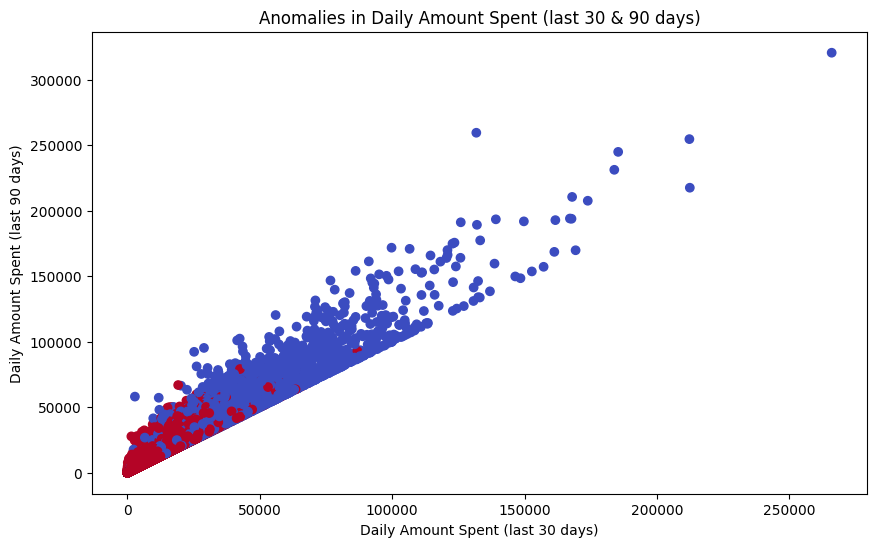

In [124]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv(r'F:\Data Trained csv file\Data file.csv')

# Step 1: Preprocessing
# Dropping Unnamed: 0, msisdn and pcircle columns because it's useless.
df.drop(columns=['Unnamed: 0','msisdn','pcircle','pdate'], axis=1,inplace=True)

# Step 2: Scaling numerical features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)

# Step 3: Anomaly detection using Isolation Forest
# Initialize the model with some parameters
iso_forest = IsolationForest(contamination=0.05, random_state=42)

# Fit the model
df['anomaly'] = iso_forest.fit_predict(scaled_features)

# Step 4: Results
# Anomalies are labeled as -1, and normal points as 1
# Display the number of anomalies detected
print("Number of anomalies detected:", np.sum(df['anomaly'] == -1))

# View the anomalous rows
anomalies = df[df['anomaly'] == -1]
print(anomalies)

# Plot the results for visualization (if dataset is large, consider selecting a subset of features)
plt.figure(figsize=(10, 6))
plt.scatter(df['daily_decr30'], df['daily_decr90'], c=df['anomaly'], cmap='coolwarm')
plt.title('Anomalies in Daily Amount Spent (last 30 & 90 days)')
plt.xlabel('Daily Amount Spent (last 30 days)')
plt.ylabel('Daily Amount Spent (last 90 days)')
plt.show()
